# Project 1

## Group partner: Jack Stoetzel

## Dataset: COVID-19 Dataset - Url: [Link](https://kaggle.com/imdevskp/corona-virus-report)

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

# Import data from csv file. CSV file: 10 Columns x 35157 Rows.
COVID = pd.read_csv('data/full_grouped.csv', skiprows=[0], header = None, skipinitialspace = True,
                names = ['date', 'count-reg', 'case', 'death', 'recover', 'active', 'ncase', 'ndeath', 'nrecover', 'who'])

## Project Questions:

### (a): The type of population being sampled is the number of COVID-19 cases/deaths/recoveries per each country from January 22nd, 2020 to July 27th, 2020. The thing mainly getting measured is the change in cases per day per country

### (b): The features the dataset has is: date, country/region, confirmed cases, deaths, recoveries, active cases, new cases, new recoveries, new deaths, and the WHO region.

### (c): The data in this dataset is quantitative-continuous. The data is measures cases with values, and not descriptions, so it is quantitative *not* qualitative. It also measures the cases over a period of time, so it is continuous.

### (d): The data is complete; there does not exist any NAN or - or NULL values. Unless a country's COVID-19 cases were not publicized, all the data in this dataset is either 0 or > 0, or a region.

### (e): The features are chosen to be a part of the dataset because people can pivot or manipulate the dataset in order to create a timeline of COVID-19 cases from January 22nd to July 27th for every country. The 'new cases' and 'new deaths' are also important values to include because it can tell how many deaths or cases are accrued everyday.

### (f): A feature that could be included in this dataset that would improve it would be: an error rate such as +/-0.04%. If all the data is as accurate as possible, it is not as important for someone to add this column, but if some data is known to be less reliable, maybe this would improve the average values.

### (g): In this pivotted table below, the index is WHO-regions, the columns are the total cases/deaths/recoveres, and the values are each WHO-regions cases/deaths/recoveries using the aggregation function `sum()`. In this new table, we can see that the Americas (North & South) make up the most new cases, deaths and recoveries; whereas the Western Pacific reports much lower numbers (likely due to better handling of COVID-19 cases), and/or lack of testing kits.

In [89]:
byRegion = COVID[['who', 'ncase', 'ndeath', 'nrecover']].groupby(['who']).sum().sort_values(['ncase'], ascending=False)
byRegion.columns = ['Total Cases', 'Total Deaths', 'Total Recoveries']
byRegion.index.name = 'Region'
print(byRegion)

# Using panda's pivot() is cringe.

                       Total Cases  Total Deaths  Total Recoveries
Region                                                            
Americas                   8842455        342732           4468616
Europe                     3316928        211144           1993723
South-East Asia            1835296         41349           1156933
Eastern Mediterranean      1490854         38339           1201400
Africa                      723540         12223            440645
Western Pacific             291879          8232            206742


### (h): Logically speaking, there is a relationship between current cases 'case' and new cases 'ncase', because current cases for the next day is equal to current cases + new cases. The same goes for deaths/new deaths, and recoveries/new recoveries. Another relationship that can be identified is: new cases to new deaths to new recoveries. The higher the new cases, the higher the new deaths and recoveries becomes, since you cannot have one without the other.

### h(i): See line graph below.

### h(ii): Once again, calculating the likelihood one values effects the other, and seeing if it is statistically significant (p <= 0.05). Or a better method would be to indentify these values have a logical relation, and use data such as the graph below to prove it. Nearly every time a spike in new cases occurs, a spike in new recoveries happens too.

### h(iii): An obvious external inference that can be made for this data is: number of hospitalizations. I would hypothesize that the number of hospitalizations would increase as the number of new cases go up at a rate of 15% +/- 5% the size of new cases. I am lead to believe this as the CDC says that 80% of all COVID-19 cases are asymptomatic, 15% have breathing issues, and 5% need assistance breathing. 15% +/- 5% is estimated from the 20% symptomatic cases, and then a rate of error.

Text(0.5,0.98,'Number of New Cases/Deaths/Recoveries From Jan 22nd - July 27th')

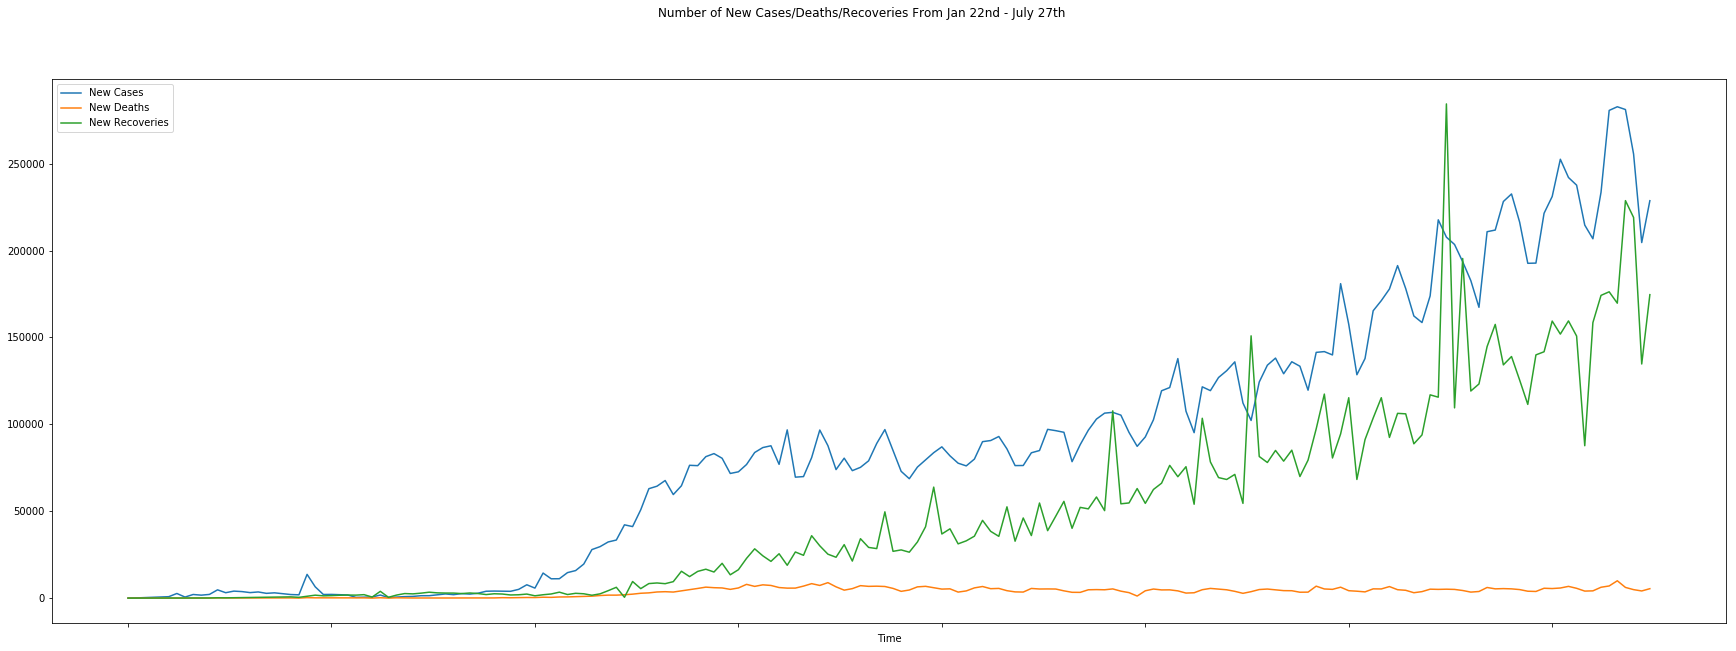

In [90]:
CD = COVID[['date', 'ncase', 'ndeath', 'nrecover']].groupby(['date']).sum()
dates = [date for date in CD.index]
CD['Time'] = dates

axis = pl.figure(figsize=(30, 10)).gca()
CD.columns = ['New Cases', 'New Deaths', 'New Recoveries', 'Time']
CD.plot.line(x='Time', y=['New Cases', 'New Deaths', 'New Recoveries'], ax=axis)
pl.suptitle('Number of New Cases/Deaths/Recoveries From Jan 22nd - July 27th')


### (i): By sorting the number of cases/deaths/recoveries per each country (in addition to the population of the country) we could rate the country by its preparedness and effectiveness in counteracting COVID-19. To simplify it, I will compare the total cases to total recoveries for each country. Assuming the data is accurate, one would use this data to determine which country needs the most attention when it comes to the pandemic.

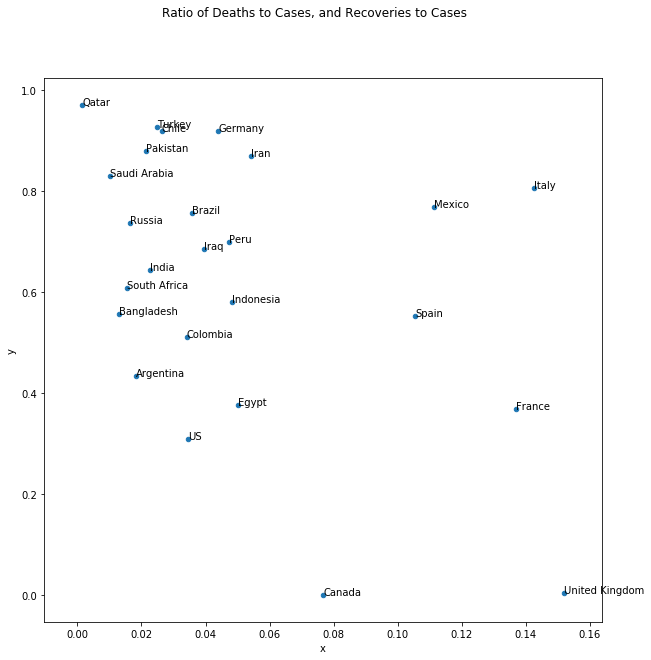

In [97]:
Recovery = COVID[['count-reg', 'case', 'death', 'recover']].groupby(['count-reg']).max().sort_values(['case'], ascending=False)
Recovery = Recovery.head(25)

Recovery['deathratio'] = Recovery['death'] / Recovery['case']
Recovery['recoverratio'] = Recovery['recover'] / Recovery['case']

Recovery = pd.DataFrame(dict(x=Recovery['deathratio'], y=Recovery['recoverratio'], country=Recovery.index))

axis = pl.figure(figsize=(10, 10)).gca()
ax = Recovery.plot.scatter(x='x', y='y', ax=axis)
for num, text in enumerate(Recovery.index):
    ax.annotate(text, (Recovery.x.iat[num], Recovery.y.iat[num]))
pl.suptitle('Ratio of Deaths to Cases, and Recoveries to Cases')
plt.show()

### (i Graph Explained): The above scatter plot shows the ratio of deaths to total cases and the ratio of recoveries to total cases per each country. With that being mentioned, a country benefits from being on the left most side, and as high as possible on the y axis. This plot is meant to visualize how deaths and recoveries rates for 25 countries with the highest cases. 